In [82]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt
import seaborn as sns

listColumnas = []


In [83]:
df = pd.read_csv("Estadísticas de Casos Sometidos.csv")
df

,Delito,Provincia,Cantidad,Mes,Año
0,Amenaza Agravada (307),Azua,1,Enero,2017.0
1,Clasificacion Por Cantidad (5-A),Azua,10,Enero,2017.0
2,Clasificacion Por Gramos Y Porciones (6-A),Azua,6,Enero,2017.0
3,Clasificacion Posesion De Marihuana (6-A),Azua,3,Enero,2017.0
4,Cómplice De Un Crimen O Delito (s 59),Azua,2,Enero,2017.0
...,...,...,...,...,...
113111,Violación Sexual,Villa Altagracia,2,Octubre,2022.0
113112,Violencia Contra La Mujer,Villa Altagracia,2,Octubre,2022.0
113113,Violencia De Género,Villa Altagracia,4,Octubre,2022.0
113114,Violencia Doméstica O Intrafamiliar,Villa Altagracia,29,Octubre,2022.0


In [84]:
def limpiar_datos (expresionRegular, palabra_clave):
    global df
    global listColumnas
    
    condicion = df["Delito"].str.contains(expresionRegular)
    df.loc[condicion, "Delito"] = palabra_clave
    listColumnas.append(palabra_clave)

def comprobarRegistros(expresionRegular):
    test = df[df["Delito"].str.contains(expresionRegular)]  
    
    for delitos in test["Delito"].unique():
        print(delitos)

In [85]:
dictCrimenes = {
    'Robo': r'[Rr]obo',
    'Agresión sexual': r'([Agresión|Abuso] [Ss]exual|[Aa]ctividad [Ss]exual [Nn]o [Cc]onsentida)',
    'Violencia': r'([Vv]iolencia|[Gg]olpe|[Aa]gresi)',
    "Tentativa de crimen o delito": r'[Tt]entativa',
    'Posesión, uso o tráfico de drogas': r'([Dd]roga|[Mm]arihuana|[Cc]oca)',
    'Estafa': r'[Ee]stafa',
    'Homicidio': r'([Hh]omicidio|[Aa]sesinato)',
    # 'Pornografía Infantil': r'[Pp]ornograf[íi¢]a Infantil',
    'Secuestro': r'[Ss]ecuestro',
    'Amenaza': r'[Aa]menaza',
    # 'Incesto': r'[Ii]ncesto',
    'Cómplice de un crimen': r'C[óo¢]mplice',
    'Portación y uso de armas blancas y de fuego': r'([Aa]rma|Delito de portac)',
    # 'Juegos de azar': r'[Jj]uego',
    'Abusos': r'[Aa]buso',
    # 'Asesinato': r'[Aa]sesinato',
    'Suicidios': r'[Ss]uicidio',
    'Infracción a las leyes de salud': r'[Ss]alud',
    "Asociación en un crimen": r'[Aa]sociaci',
    "Tráfico ilícito": r'[Tt]rafico',
    "Detención o encierro ilegal": r'(Detenci[oó¢]|[Ee]ncierro)', 
    "Accidentes": r'[Aa]ccidentes', 
    "Violación a las leyes y reglamentos": r'[Vv]iola',
    'Daño a propiedad ajena': r'[Cc]osas? [Aa]jena',
    'Falsificación': r'F(alse|alsi)',
    'Acceso ilícito de datos o servicios': r'[Aa]cceso [Ii]l[í]cito',
    "Infracciones": r'[Ii]nfracc', 
    # 'Incumplimiento de las necesidades básicas de un menor': r'([Nn]aturaleza|Alimentos Y Las Necesidades)', 
    'Contrabando': r'[Cc]ontrab',
    "Delitos electorales": r'[Ee]lector',
    "Delitos menores": r'([Nn]aturaleza|Alimentos Y Las Necesidades|[Pp]ornograf[íi¢]a Infantil|[Ii]ncesto|[Jj]uego)'
    # [Ee]ncierro
}

for palabraClave, expresionRegular in dictCrimenes.items():
    condicion = df["Delito"].str.contains(expresionRegular)
    df.loc[condicion, "Delito"] = palabraClave
    listColumnas.append(palabraClave)

df["Delito"].value_counts().count()

C:\Users\Manuel\AppData\Local\Temp\ipykernel_14752\2165642869.py:37: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condicion = df["Delito"].str.contains(expresionRegular)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_14752\2165642869.py:37: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condicion = df["Delito"].str.contains(expresionRegular)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_14752\2165642869.py:37: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condicion = df["Delito"].str.contains(expresionRegular)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_14752\2165642869.py:37: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condicion = df["

2956

In [87]:
comprobarRegistros(r'[Ee]ncierro')

Detención o encierro ilegal


In [88]:
df = df[df["Delito"].isin(listColumnas)]

df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')
df = df.dropna(subset=['Cantidad'])

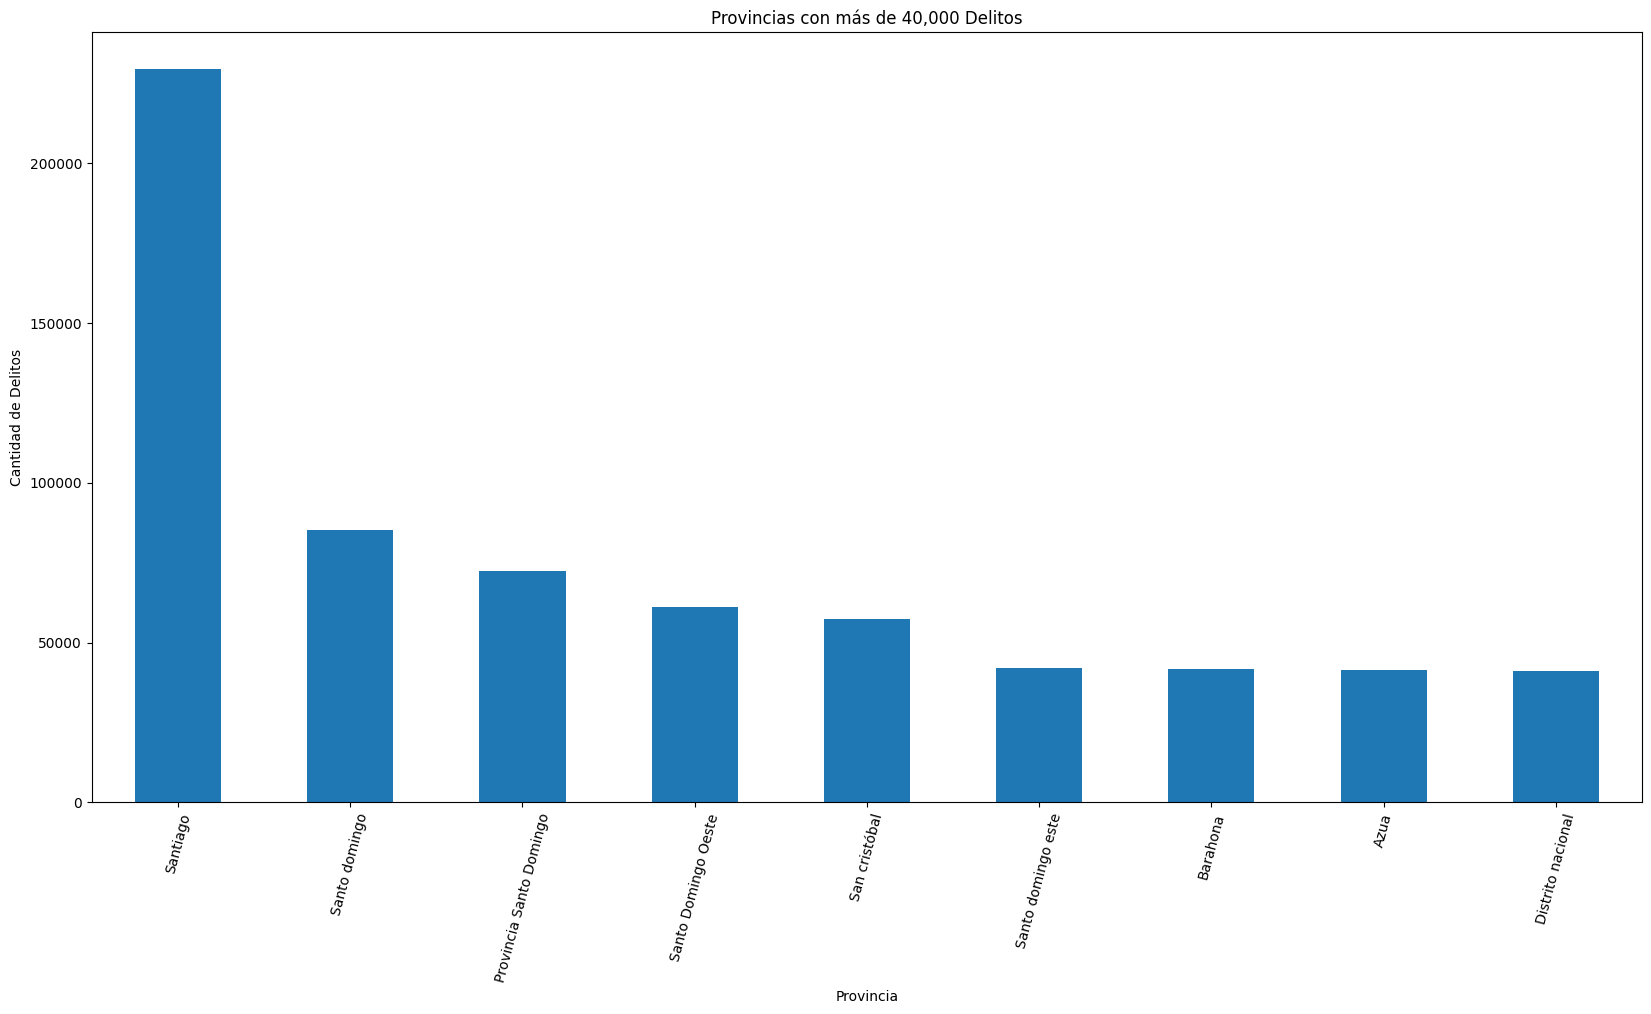

In [89]:
# Gráfico de barras
# Comparación de la cantidad de delitos entre provincias
delitos_por_provincia = df.groupby('Provincia')['Cantidad'].sum()
umbral_delitos = 40000 
provincias_con_mas_delitos = delitos_por_provincia[delitos_por_provincia > umbral_delitos]
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según sea necesario
provincias_con_mas_delitos.sort_values(ascending=False).plot(kind='bar')
plt.title('Provincias con más de 40,000 Delitos')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=75)
plt.show()

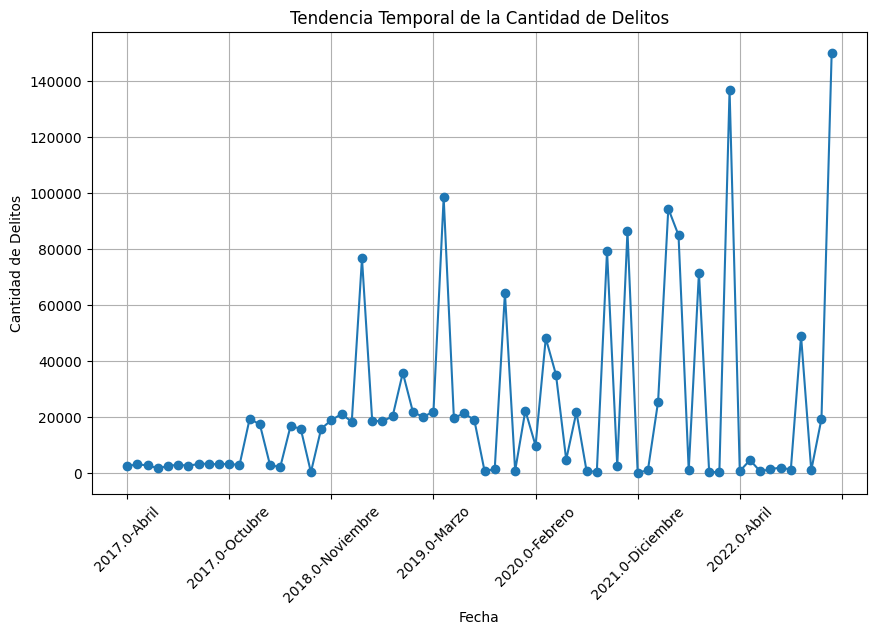

In [90]:
# Gráfico de líneas:
# Tendencia temporal de la cantidad de delitos
plt.figure(figsize=(10, 6))
df['Fecha'] = df['Año'].astype(str) + '-' + df['Mes']
df.groupby('Fecha')['Cantidad'].sum().plot(kind='line', marker='o')
plt.title('Tendencia Temporal de la Cantidad de Delitos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

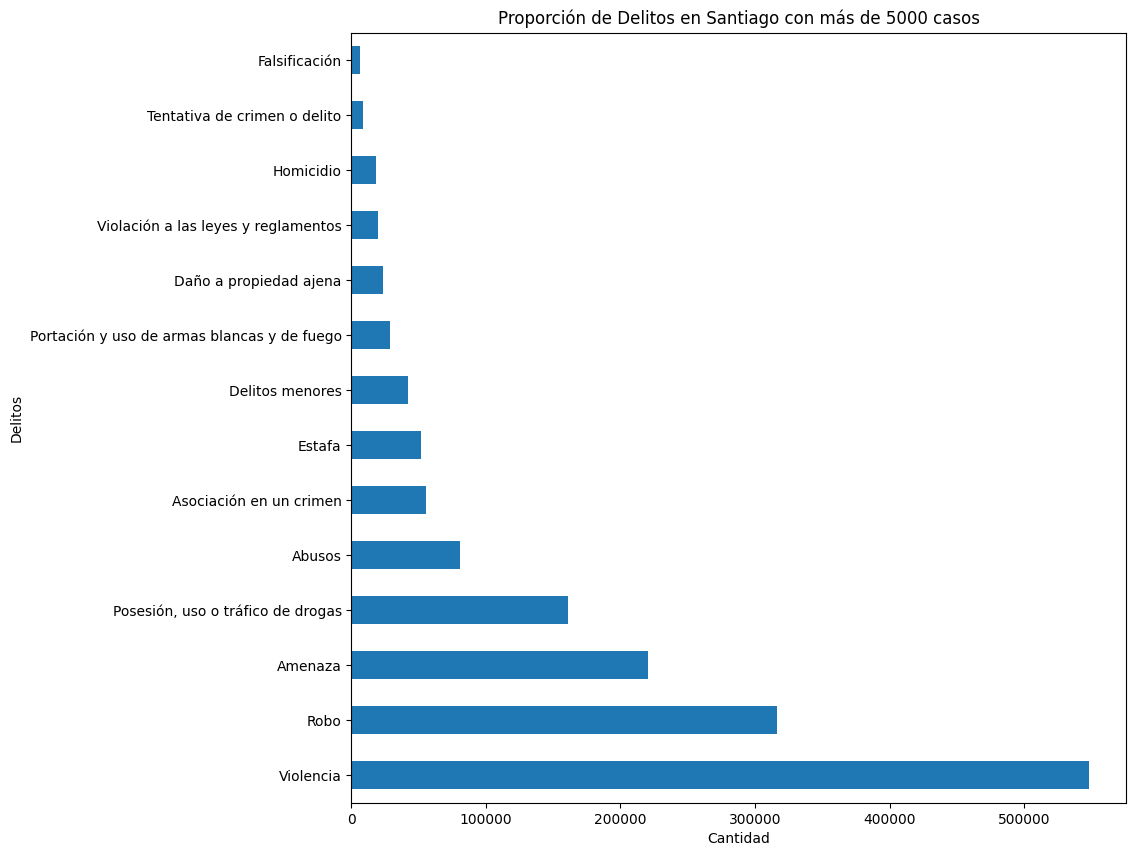

In [91]:
provincia_seleccionada = 'Santiago'
df_provincia = df[df['Provincia'] == provincia_seleccionada]
delitos_por_provincia = df.groupby('Delito')['Cantidad'].sum()
umbral_delitos = 5000 
provincias_con_mas_delitos = delitos_por_provincia[delitos_por_provincia >= umbral_delitos]
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura según sea necesario
provincias_con_mas_delitos.sort_values(ascending=False).plot(kind='barh')
plt.title(f'Proporción de Delitos en {provincia_seleccionada} con más de 5000 casos')

plt.ylabel('Delitos')
plt.xlabel('Cantidad')
plt.show()


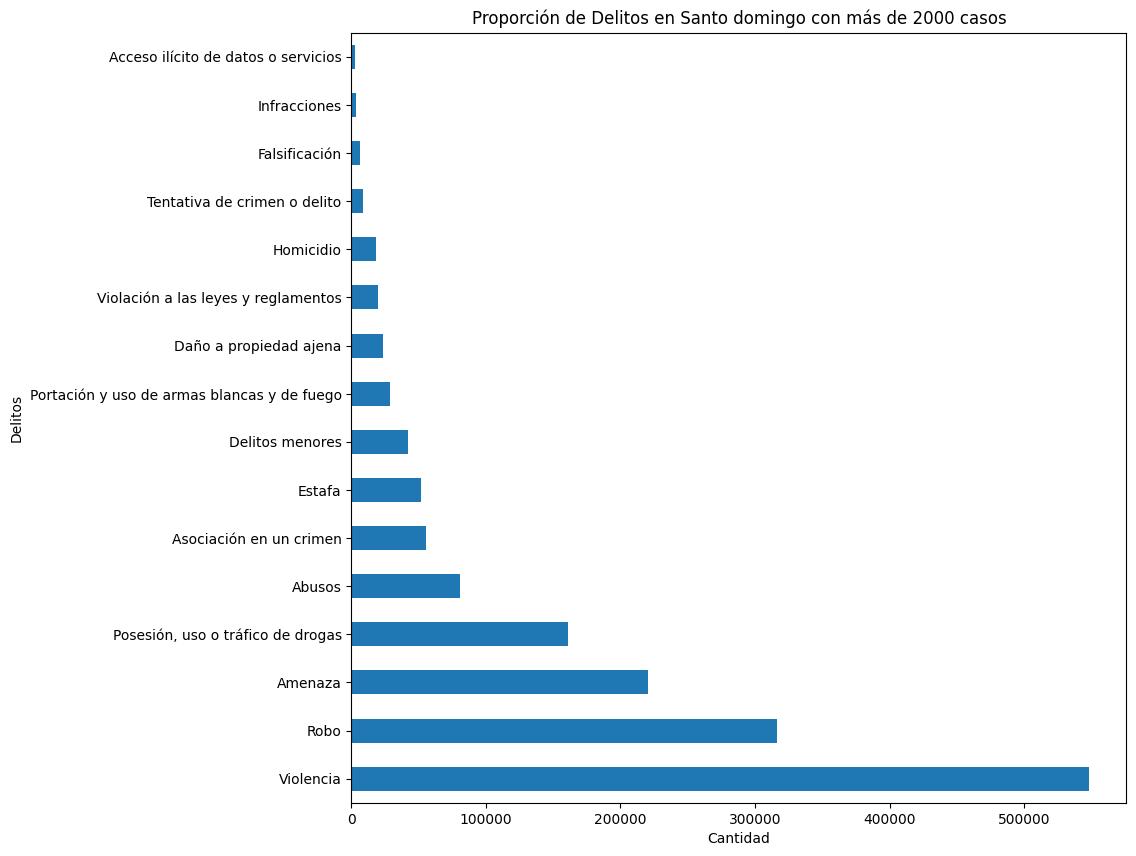

In [92]:
provincia_seleccionada = 'Santo domingo'
df_provincia = df[df['Provincia'] == provincia_seleccionada]
delitos_por_provincia = df.groupby('Delito')['Cantidad'].sum()
umbral_delitos = 2000 
provincias_con_mas_delitos = delitos_por_provincia[delitos_por_provincia >= umbral_delitos]
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura según sea necesario
provincias_con_mas_delitos.sort_values(ascending=False).plot(kind='barh')
plt.title(f'Proporción de Delitos en {provincia_seleccionada} con más de 2000 casos')

plt.ylabel('Delitos')
plt.xlabel('Cantidad')
plt.show()